In [2]:
import numpy as np
import seaborn as sns
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import scipy
from scipy.stats.mstats import winsorize

df = pd.read_csv(r'glm.csv')
df_adj = pd.read_csv(r'glm_adj.csv')
print(df)
print(df_adj)

   Unnamed: 0  Estimate  Std. Error   z value  Pr(>|z|)
0        X349  0.052351    0.054814  0.955067  0.339544
1        X124  0.048599    0.061804  0.786338  0.431670
2        X282  0.014807    0.090719  0.163215  0.870349
3        X294 -0.032072    0.090046 -0.356173  0.721711
4        X549 -0.009427    0.055581 -0.169605  0.865321
..        ...       ...         ...       ...       ...
95       X580  0.010935    0.073659  0.148450  0.881988
96        X91 -0.023300    0.066609 -0.349810  0.726482
97       X518  0.185612    0.491277  0.377815  0.705568
98       X223 -0.000316    0.057839 -0.005456  0.995647
99       X511  0.055144    0.053548  1.029791  0.303108

[100 rows x 5 columns]
   Unnamed: 0  adjusted_mle       std   z.value   p.value
0        X349      0.044636  0.098001  0.455464  0.648775
1        X124      0.041437  0.110814  0.373931  0.708456
2        X282      0.012625  0.163159  0.077376  0.938324
3        X294     -0.027345  0.160762 -0.170099  0.864933
4        X549 

In [3]:
scatter = pd.DataFrame()
scatter.insert(0,'x',df['Estimate'])
scatter.insert(1,'y', df_adj['adjusted_mle'])
print(scatter)

           x         y
0   0.052351  0.044636
1   0.048599  0.041437
2   0.014807  0.012625
3  -0.032072 -0.027345
4  -0.009427 -0.008038
..       ...       ...
95  0.010935  0.009323
96 -0.023300 -0.019867
97  0.185612  0.158258
98 -0.000316 -0.000269
99  0.055144  0.047017

[100 rows x 2 columns]


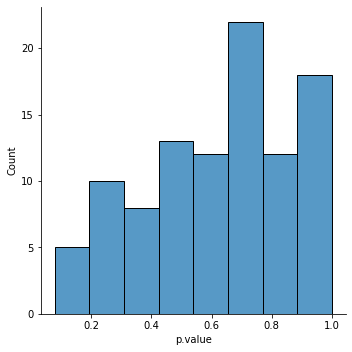

In [4]:
s = sns.displot(df,x = "Pr(>|z|)")
s.set(xlabel = 'p.value')
s.set_titles('p-values for the unadjusted GLM')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

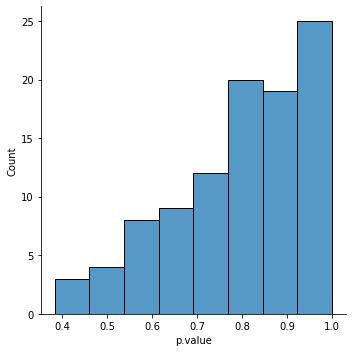

In [5]:
sns.displot(df_adj,x="p.value")
s.set_title('p-values for the adjusted GLM')

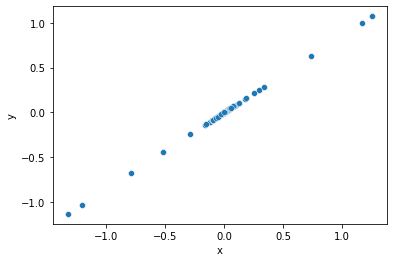

In [6]:
sns.scatterplot(data = scatter, x = 'x', y = 'y')

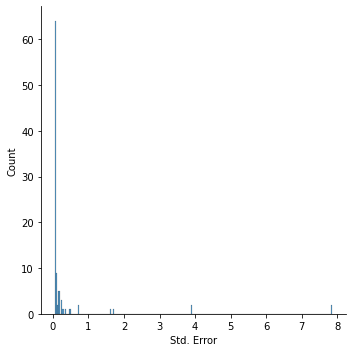

In [7]:
sns.displot(df,x = "Std. Error")

In [8]:
a = df_adj["std"]
b = df["Std. Error"]
aw = winsorize(a, limits = [0.1,0.1])
bw = winsorize(b,limits = [0.1,0.1])

In [9]:
sigma_ratio = a/b

In [10]:
scatter_sigma = pd.DataFrame()
one_to_hundred = pd.Series(range(1,101))
scatter_sigma.insert(0,'x',one_to_hundred)
scatter_sigma.insert(1,'y',sigma_ratio)
print(scatter_sigma)

      x         y
0     1  1.787883
1     2  1.792988
2     3  1.798508
3     4  1.785336
4     5  1.798257
..  ...       ...
95   96  1.794196
96   97  1.790791
97   98  1.796769
98   99  1.779988
99  100  1.795742

[100 rows x 2 columns]


Text(0.5, 1.0, 'Ratios of $\\dfrac{\\sigma_*}{\\sigma}$')

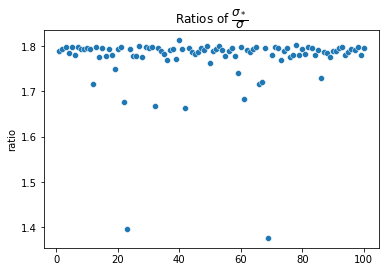

In [11]:
s=sns.scatterplot(data = scatter_sigma, x='x', y = 'y')
s.set(xlabel = '', ylabel = 'ratio')
s.set_title('Ratios of $\dfrac{\sigma_*}{\sigma}$')

In [23]:
betadf = pd.read_csv('beta.csv')

In [25]:
mlc = 0
beta = []
for i in betadf['x']:
    if np.isnan(i):
        mlc += 1
    else:
        beta.append(i)
print(beta)
print(mlc/50)

[1.16378830613652, 1.1444991053064901, 1.15922468962611, 1.18829983151655, 1.17298660735904, 1.15932317964241, 1.16864012054842, 1.11558124002342, 1.13651617158125, 1.16862995233053, 1.18554522896695, 1.17294674932756, 1.17242190846048, 1.1672234471138, 1.11002885662677, 1.1342412787418898, 1.17713668066875, 1.13498496674268, 1.16558371789969, 1.14610411223128, 1.17060665731803, 1.1467789410199598, 1.1220425075637301, 1.1019933128386101, 1.14576240634529, 1.17174324939662, 1.16444322827967, 1.1764825567631798, 1.1713668576853602, 1.1711109885412299, 1.1974467944902, 1.1724184417405001, 1.17439519049722]
0.34


In [41]:
bplot = pd.DataFrame()
bplot.insert(0,'beta ratio',beta)
print(bplot)

    beta ratio
0     1.163788
1     1.144499
2     1.159225
3     1.188300
4     1.172987
5     1.159323
6     1.168640
7     1.115581
8     1.136516
9     1.168630
10    1.185545
11    1.172947
12    1.172422
13    1.167223
14    1.110029
15    1.134241
16    1.177137
17    1.134985
18    1.165584
19    1.146104
20    1.170607
21    1.146779
22    1.122043
23    1.101993
24    1.145762
25    1.171743
26    1.164443
27    1.176483
28    1.171367
29    1.171111
30    1.197447
31    1.172418
32    1.174395


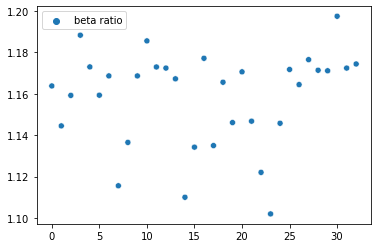

In [42]:
sns.scatterplot(data = bplot)